In [34]:
from diffusion import Diffusion
from data import Data
import torch
import numpy as np
import matplotlib.pyplot as plt
import copy
from model import AE_4, AE_3, AE_2, AE_1, AE_0
%load_ext autoreload
%autoreload 2
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu"); print(device)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
cuda:0


In [72]:
ntot = 1000      # number of samples
d = 4     # dimensions
epochs = 200 # training
p = 0.8       # imbalance prob
N = 1000      # generation size
std = d ** (1/2) # std of initial sample
N_steps=100   # number of "discretization" steps for ODE
# data
nrm = 1
σ = 1
μ = torch.ones(d)
model_class = AE_1

weight_decay_dict = {
    'w': 1e-1,
    'u': 1e-1,
    'b': 1e-1,
    'c': 0.
}

In [73]:
def opt_gen(model):
    return torch.optim.Adam([{'params': [getattr(model,k)], 'weight_decay': v} for k, v in weight_decay_dict.items()], lr=.04)

In [74]:
α  = lambda t: (1-t) * std
β  = lambda t: t

X_train = Data(ntot,std,μ,σ,d,p,α,β,device)
X_train.gen_rand()
X_gen   = np.random.randn(N,d) * std

diffusion = Diffusion(α, β, model_class, opt_gen, X_train, copy.deepcopy(X_gen), N_steps, epochs, ntot, d, device)
diffusion.run()

0.0
0.01
0.02
0.03
0.04
0.05
0.060000000000000005
0.07
0.08
0.09
0.09999999999999999
0.10999999999999999
0.11999999999999998
0.12999999999999998
0.13999999999999999
0.15
0.16
0.17
0.18000000000000002
0.19000000000000003
0.20000000000000004
0.21000000000000005
0.22000000000000006
0.23000000000000007
0.24000000000000007
0.25000000000000006
0.26000000000000006
0.2700000000000001
0.2800000000000001
0.2900000000000001
0.3000000000000001
0.3100000000000001
0.3200000000000001
0.3300000000000001
0.34000000000000014
0.35000000000000014
0.36000000000000015
0.37000000000000016
0.38000000000000017
0.3900000000000002
0.4000000000000002
0.4100000000000002
0.4200000000000002
0.4300000000000002
0.4400000000000002
0.45000000000000023
0.46000000000000024
0.47000000000000025
0.48000000000000026
0.49000000000000027
0.5000000000000002
0.5100000000000002
0.5200000000000002
0.5300000000000002
0.5400000000000003
0.5500000000000003
0.5600000000000003
0.5700000000000003
0.5800000000000003
0.5900000000000003
0.6

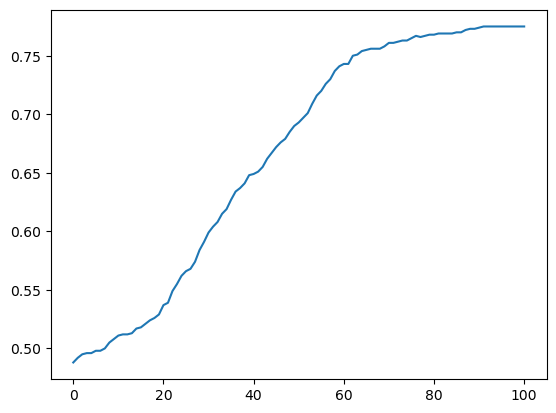

In [75]:
plt.plot(diffusion.summary['p'])

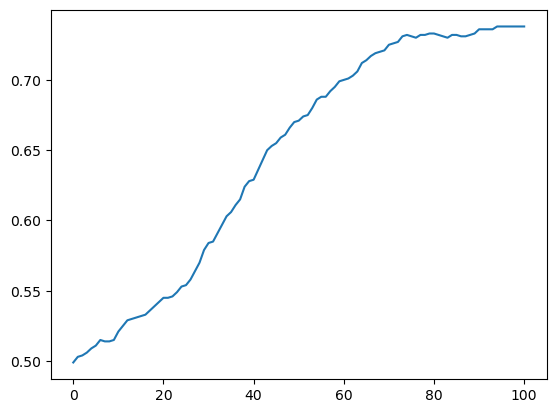

In [69]:
plt.plot(diffusion.summary['p'])

In [70]:
plt.plot(diffusion.summary['p']))

SyntaxError: unmatched ')' (68104639.py, line 1)

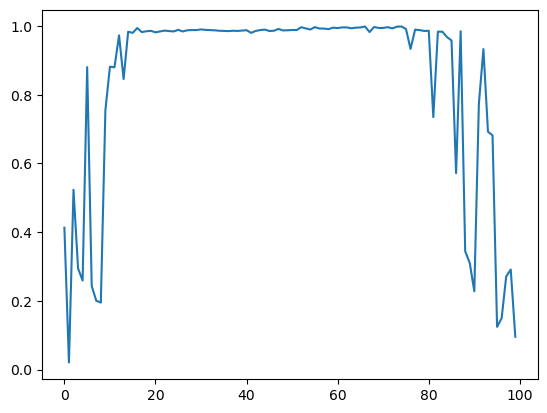

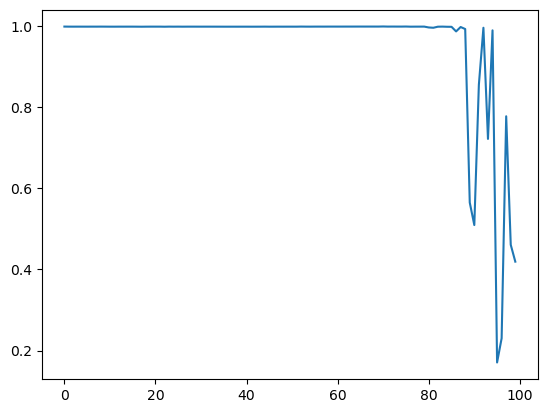

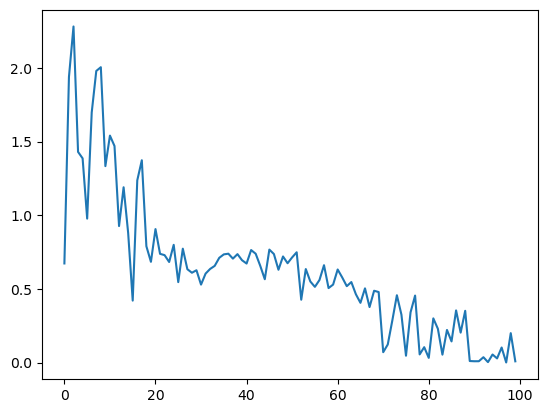

In [76]:
plt.plot(np.abs(diffusion.summary['Cos w']))
plt.show()
plt.plot(np.abs(diffusion.summary['Cos u']))
plt.show()
plt.plot(np.abs(diffusion.summary['b']))
plt.show()

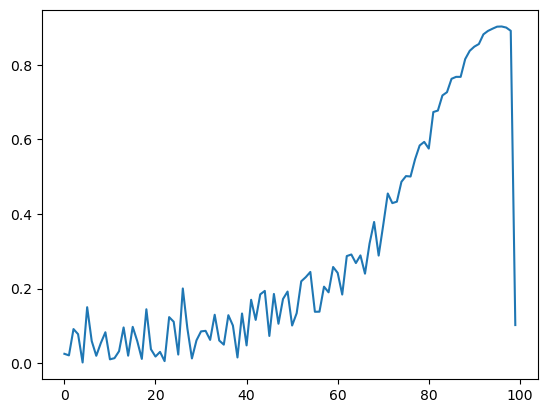

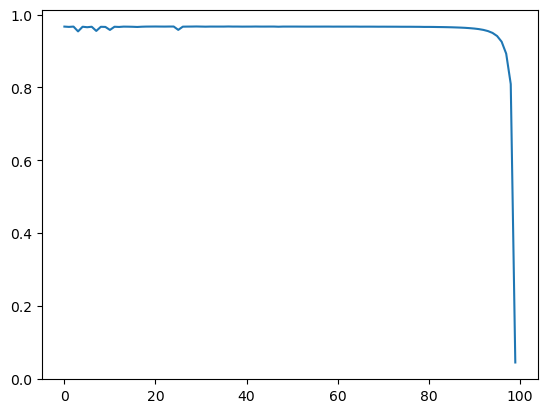

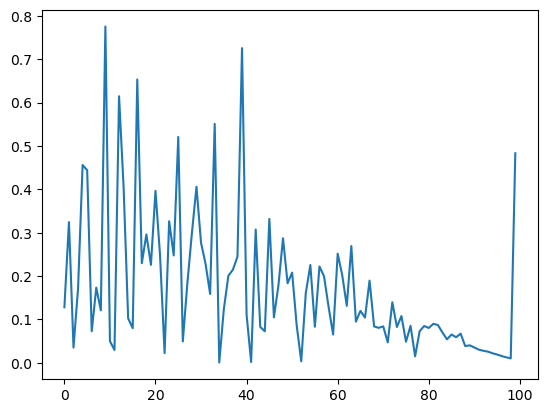

In [61]:
plt.plot(np.abs(diffusion.summary['Cos w']))
plt.show()
plt.plot(np.abs(diffusion.summary['Cos u']))
plt.show()
plt.plot(np.abs(diffusion.summary['b']))
plt.show()

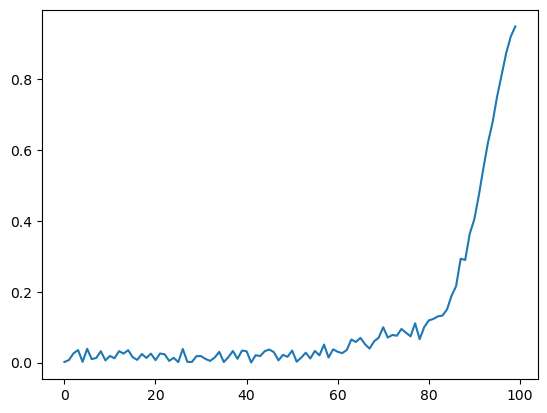

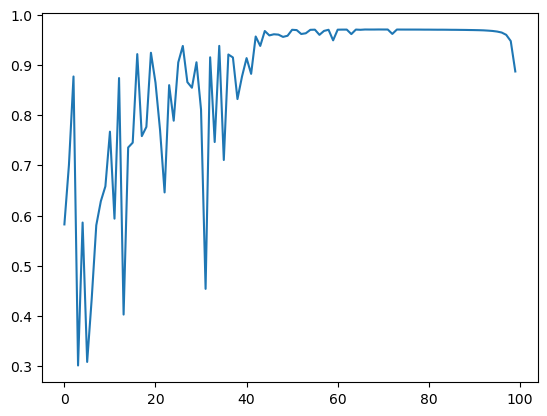

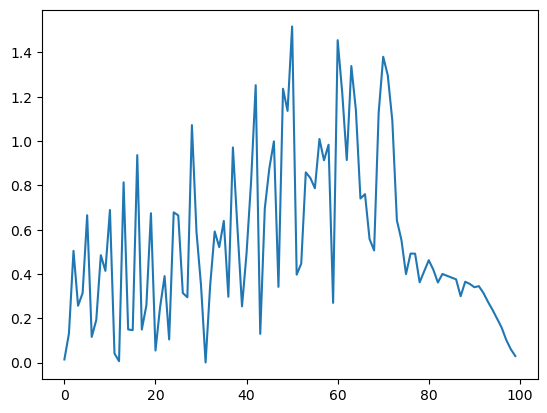

In [44]:
plt.plot(np.abs(diffusion.summary['Cos w']))
plt.show()
plt.plot(np.abs(diffusion.summary['Cos u']))
plt.show()
plt.plot(np.abs(diffusion.summary['b']))
plt.show()

In [43]:
a = diffusion.summary['Grad w']

In [30]:
torch.ones((16, 1)) @ torch.ones((1, 15))

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1.,

In [64]:
np.linalg.norm(diffusion.summary['Grad w'], axis=1)

array([  7.670802 ,   7.0867147,   9.513759 ,   3.1420012,   4.129785 ,
        15.12499  ,   6.107143 ,  21.992428 ,   9.857539 ,   6.421381 ,
         5.9375167,  13.886418 ,  12.349285 , 255.2813   ,   7.2501025,
        16.063375 ,   4.0546565,   5.3473334,  20.577408 ,   6.327383 ,
        13.805419 ,   6.0643797,   6.5541   ,   8.401003 ,   5.9449916,
         5.47742  ,  10.950911 ,   7.9081874,   7.2206326,   6.638791 ,
         4.9211173,   4.4508104,   4.734126 ,   3.818701 ,   3.497666 ,
         3.700642 ,   5.4377923,   3.8778622,  23.193874 ,   4.29219  ,
         4.613188 ,   6.0250115,  23.380693 ,   7.342582 ,  18.405426 ,
         4.016666 ,   5.5796995,  16.293425 ,   3.9018147,   2.2072966,
         1.8907651, 301.84067  ,   1.9950572,   1.9243268,  59.159775 ,
        32.682526 ,   1.980237 ,   2.4628146,   2.0260348,   1.5858041,
         4.166808 ,   4.807958 ,   1.9125221,   5.1454234,  11.671141 ,
         3.5406346,   2.277274 ,   2.7218466,   2.8137066,   3.5

In [ ]:
torch.tile(torch.tensor([1,2,3]), 

In [65]:
np.linalg.norm(diffusion.summary['Grad u'], axis=1)

array([169.7364   , 194.88268  , 191.02562  , 183.78514  , 185.37733  ,
       184.37671  , 198.95193  , 182.72502  , 179.9583   , 180.26761  ,
       171.00485  , 208.25256  , 170.95576  , 162.73558  , 162.2848   ,
       171.7634   , 211.9291   , 136.62013  , 134.72758  , 142.757    ,
       137.61761  , 141.77808  , 193.43321  , 153.62839  , 144.61984  ,
       109.56779  , 148.79439  , 188.0439   , 121.91094  , 108.22172  ,
       131.35767  , 117.13093  ,  84.93525  , 155.4186   , 166.60522  ,
       134.97847  ,  91.38578  ,  76.9448   , 107.95918  , 119.16417  ,
        69.025246 , 188.43039  ,  70.93371  , 234.97572  , 100.93534  ,
        64.21216  ,  89.163246 ,  77.933495 , 111.06611  ,  59.07097  ,
        54.859234 ,  43.204884 ,  71.84265  ,  39.024834 ,  34.253963 ,
       212.50002  ,  28.791405 ,  20.57104  ,  21.067621 ,  30.279856 ,
        20.59015  ,  18.305885 ,  28.857685 ,  14.538089 ,  67.238716 ,
         8.311687 ,  10.764071 ,  27.444492 ,   8.55051  ,   7.5

In [31]:
diffusion.summary['p']

[0.489,
 0.491,
 0.493,
 0.494,
 0.494,
 0.497,
 0.498,
 0.498,
 0.502,
 0.505,
 0.505,
 0.505,
 0.506,
 0.509,
 0.511,
 0.514,
 0.515,
 0.517,
 0.517,
 0.52,
 0.526,
 0.53,
 0.533,
 0.535,
 0.545,
 0.548,
 0.55,
 0.546,
 0.549,
 0.553,
 0.553,
 0.554,
 0.559,
 0.559,
 0.556,
 0.564,
 0.568,
 0.574,
 0.583,
 0.586,
 0.585,
 0.588,
 0.592,
 0.591,
 0.599,
 0.594,
 0.596,
 0.597,
 0.595,
 0.595,
 0.599,
 0.604,
 0.607,
 0.604,
 0.608,
 0.604,
 0.609,
 0.61,
 0.62,
 0.624,
 0.623,
 0.636,
 0.644,
 0.654,
 0.674,
 0.662,
 0.662,
 0.677,
 0.681,
 0.678,
 0.685,
 0.707,
 0.712,
 0.723,
 0.74,
 0.75,
 0.754,
 0.771,
 0.772,
 0.776,
 0.804,
 0.836,
 0.835,
 0.828,
 0.84,
 0.818,
 0.857,
 0.835,
 0.838,
 0.809,
 0.76,
 0.709,
 0.704,
 0.737,
 0.788,
 0.814,
 0.841,
 0.817,
 0.813,
 0.743,
 0.73]

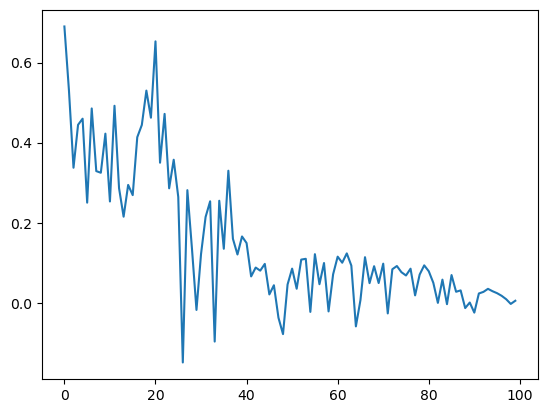

In [33]:
plt.plot(diffusion.summary['b'])

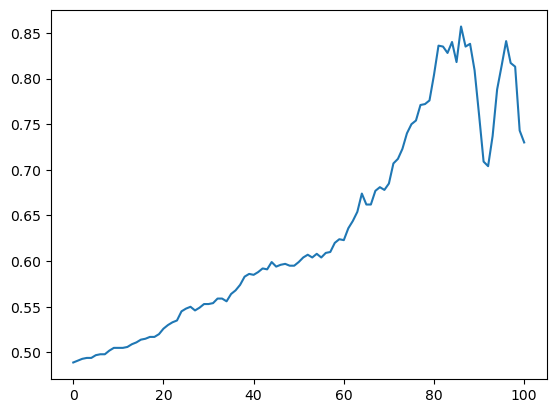

In [32]:
plt.plot(diffusion.summary['p'])

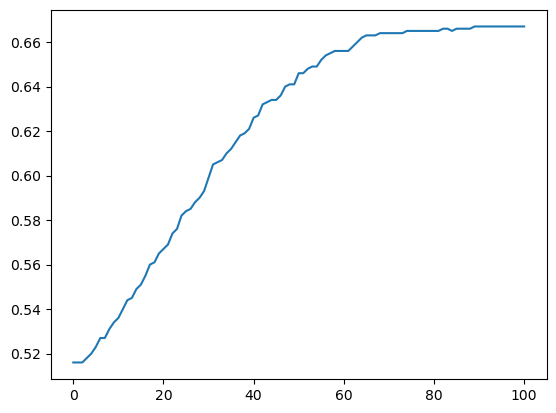

In [31]:
plt.plot(diffusion.summary['p'])

In [19]:
diffusion.summary['p']

[0.526,
 0.528,
 0.531,
 0.533,
 0.535,
 0.537,
 0.539,
 0.542,
 0.543,
 0.545,
 0.55,
 0.552,
 0.557,
 0.559,
 0.563,
 0.565,
 0.569,
 0.573,
 0.575,
 0.579,
 0.587,
 0.591,
 0.591,
 0.593,
 0.597,
 0.599,
 0.606,
 0.611,
 0.615,
 0.617,
 0.62,
 0.623,
 0.627,
 0.632,
 0.639,
 0.64,
 0.643,
 0.651,
 0.657,
 0.663,
 0.67,
 0.678,
 0.685,
 0.688,
 0.691,
 0.695,
 0.7,
 0.705,
 0.709,
 0.719,
 0.727,
 0.731,
 0.735,
 0.741,
 0.743,
 0.748,
 0.751,
 0.755,
 0.763,
 0.768,
 0.772,
 0.774,
 0.777,
 0.78,
 0.782,
 0.785,
 0.786,
 0.787,
 0.789,
 0.789,
 0.789,
 0.791,
 0.796,
 0.798,
 0.802,
 0.804,
 0.806,
 0.807,
 0.807,
 0.807,
 0.807,
 0.807,
 0.807,
 0.807,
 0.807,
 0.807,
 0.807,
 0.807,
 0.807,
 0.807,
 0.807,
 0.807,
 0.807,
 0.807,
 0.807,
 0.807,
 0.807,
 0.807,
 0.807,
 0.807,
 0.807]

In [24]:
d = diffusion

In [ ]:
plt.plot(np.array(diffusion.summary['M_t'])[:, :1000]);
#plt.xlim(70, 90)

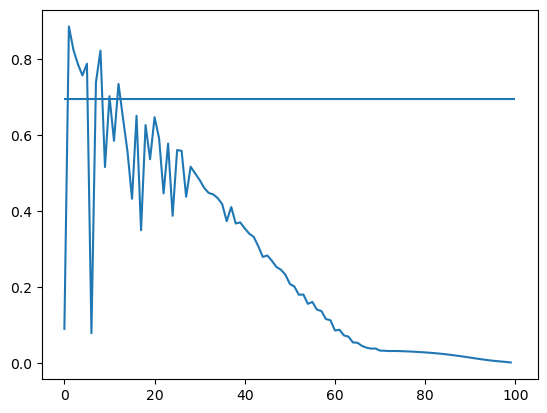

In [32]:
plt.plot(np.abs(diffusion.summary['b']))
plt.hlines(.693, 0, 100)

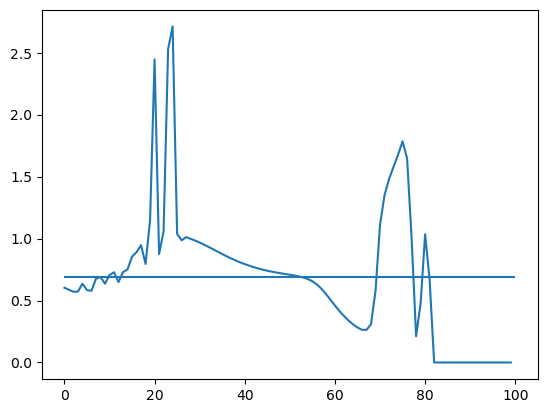

In [23]:
plt.plot(np.abs(diffusion.summary['b']))
plt.hlines(.693, 0, 100)

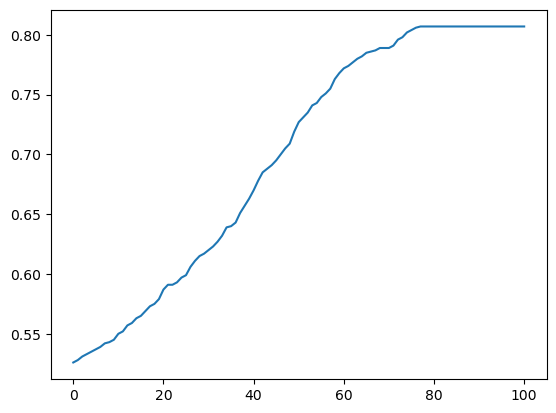

In [20]:
plt.plot(diffusion.summary['p'])

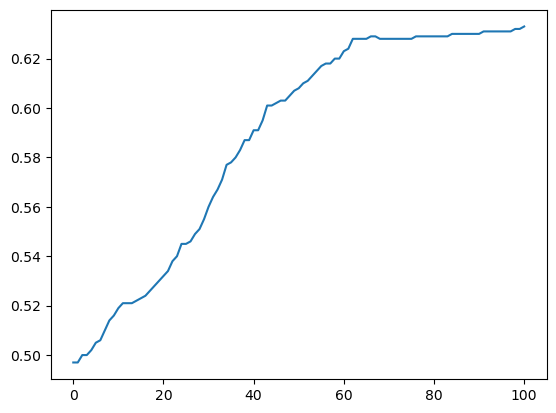

In [47]:
plt.plot(diffusion.summary['p'])

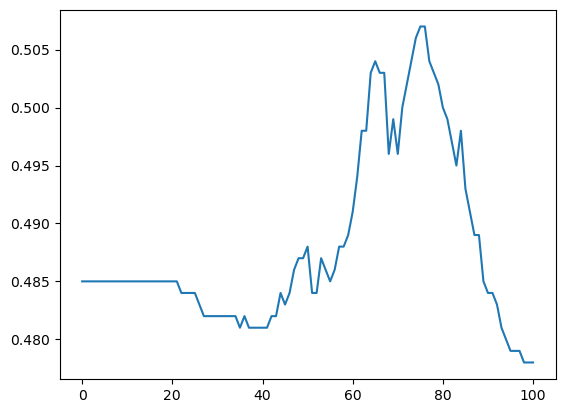

In [38]:
plt.plot(diffusion.summary['p'])

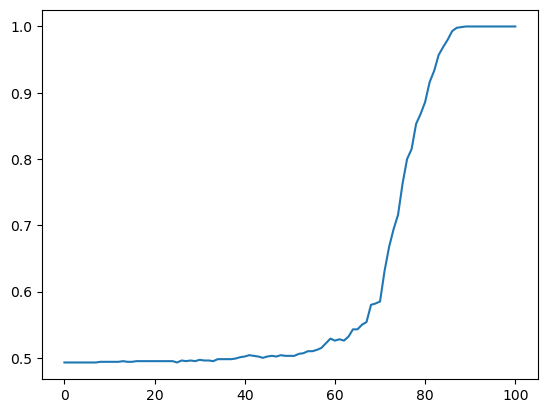

In [15]:
plt.plot(diffusion.summary['p'])

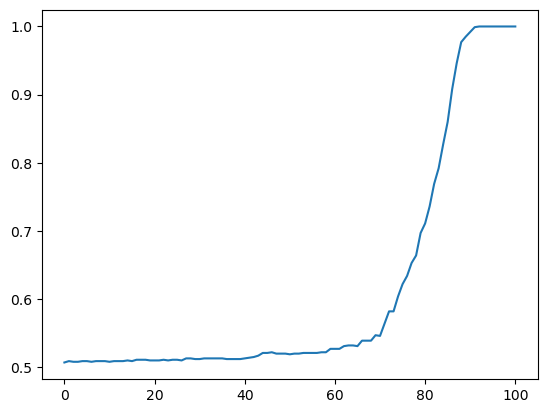

In [11]:
plt.plot(diffusion.summary['p'])

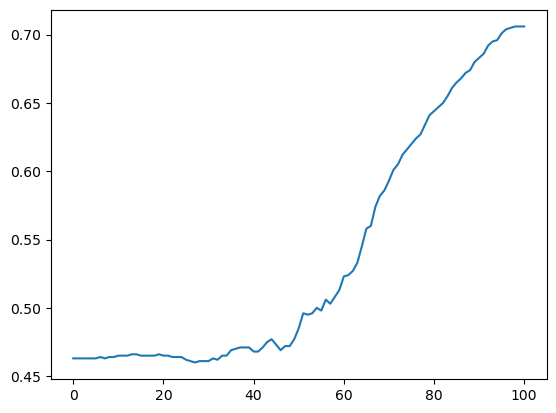

In [22]:
plt.plot(diffusion.summary['p'])

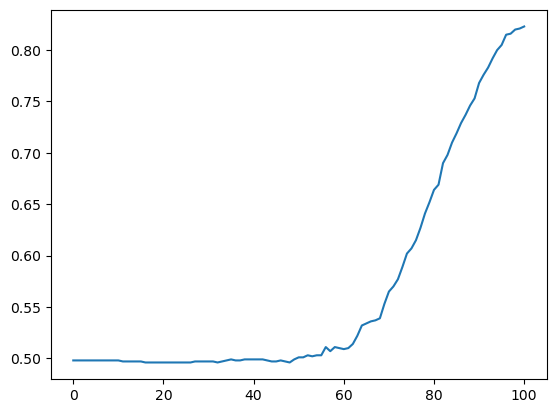

In [7]:
plt.plot(diffusion.summary['p'])

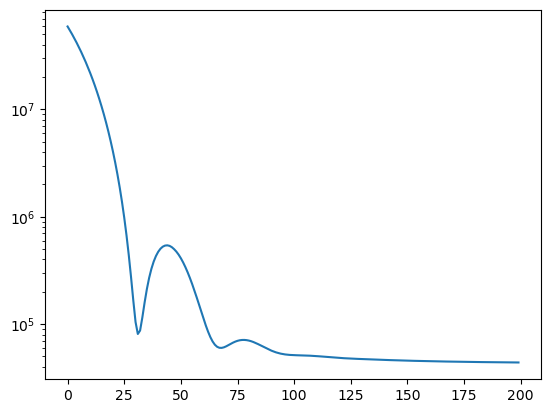

In [49]:
k = 10
plt.semilogy(diffusion.losses[k * epochs:(k+1) * epochs]);
#plt.plot()

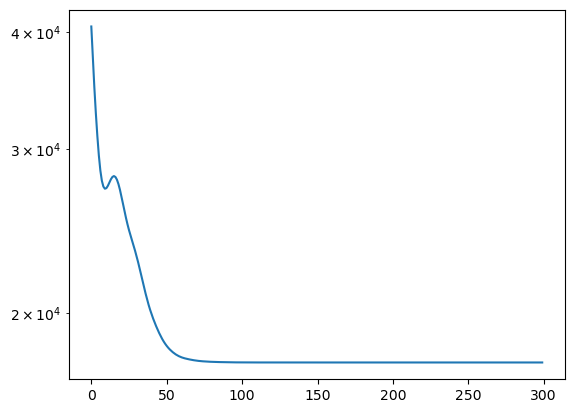

In [27]:
k = 99
plt.semilogy(diffusion.losses[k * epochs:(k+1) * epochs]);
#plt.plot()

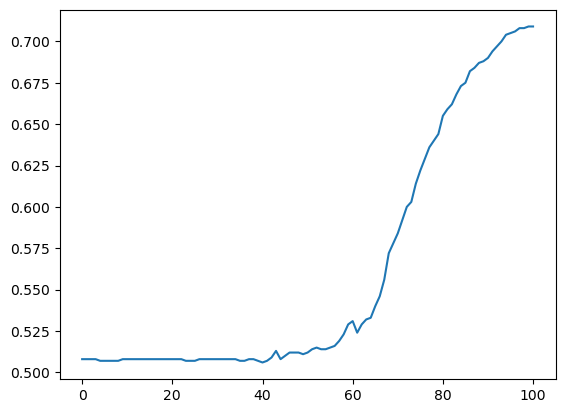

In [258]:
plt.plot(diffusion.summary['p'])

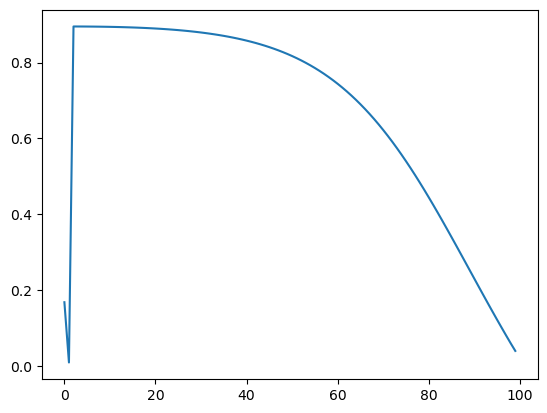

In [66]:
#aa = diffusion.summary
plt.plot(np.abs(diffusion.summary['Cos w']))

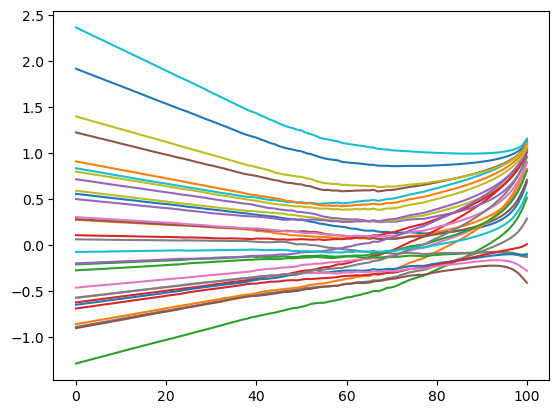

In [58]:
c = np.array(diffusion.summary['M_t'])
plt.plot(c[:, :30]);
#plt.xlim(0, 10)
#plt.ylim(-1000, 1000)

In [ ]:
plt.plot(np.abs(diffusion.summary['M_t']))

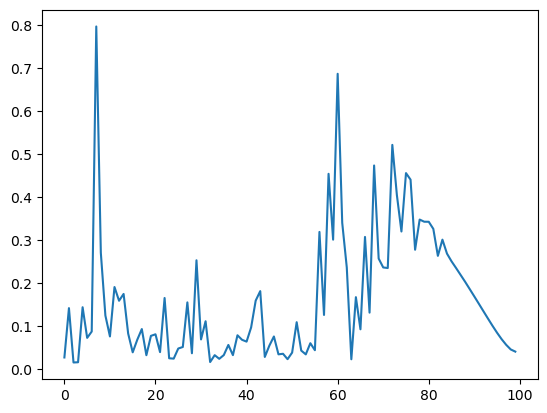

In [28]:
plt.plot(np.abs(diffusion.summary['b']))

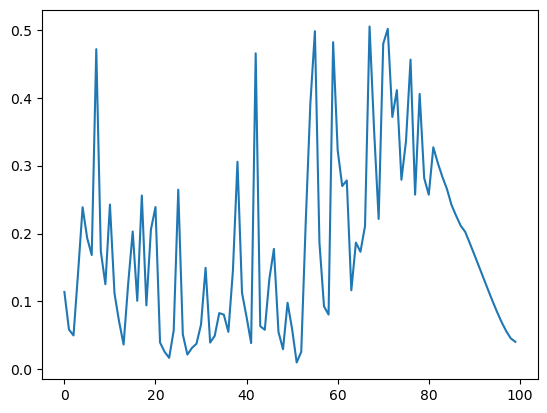

In [21]:
plt.plot(np.abs(diffusion.summary['b']))

In [152]:
h =.7
np.exp(h) / (np.exp(h) + np.exp(-h))

0.8021838885585818

Parameter containing:
tensor([0.0407], device='cuda:0', requires_grad=True)

In [176]:
np.squeeze(diffusion.summary['b'])

array([-0.24237856, -0.18517567, -0.08569282, -0.04752747, -0.07197905,
       -0.02127837,  0.13866986,  0.40545735,  0.13472305,  0.29752564,
        0.04609858,  0.03901266,  0.0216643 , -0.29642087, -0.17507198,
       -0.0230961 ,  0.07688341, -0.34528017,  0.08496984, -0.14356656,
        0.41727975, -0.4731516 ,  0.25538227,  0.3507327 , -0.24012567,
       -0.22038652, -0.21145304,  0.23723297,  0.12629214, -0.09266087,
       -0.3920231 ,  0.05276276,  0.17055084, -0.04583064, -0.12660573,
        0.25815588, -0.43304068, -0.23330696,  0.01883644, -0.24169149,
        0.33061123,  0.7058765 ,  0.32413706, -0.49449322, -0.26010242,
        0.26441136, -0.05052217,  0.09438808,  0.2629473 , -0.19198358,
       -0.22340357,  0.31609145,  0.2230807 , -0.43097386, -0.55342805,
       -0.5793349 ,  0.45244512, -0.13350907,  0.5794398 ,  0.2721771 ,
       -0.2930483 ,  0.05622589,  0.1143105 , -0.31892654,  0.1876652 ,
       -0.01951504,  0.14018495, -0.20586605,  0.37555087, -0.03

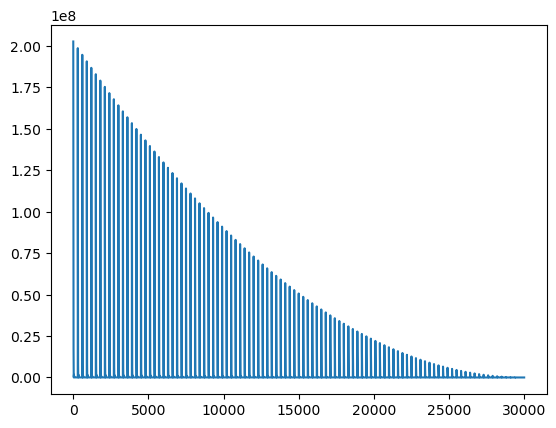

In [178]:
plt.plot(diffusion.losses)

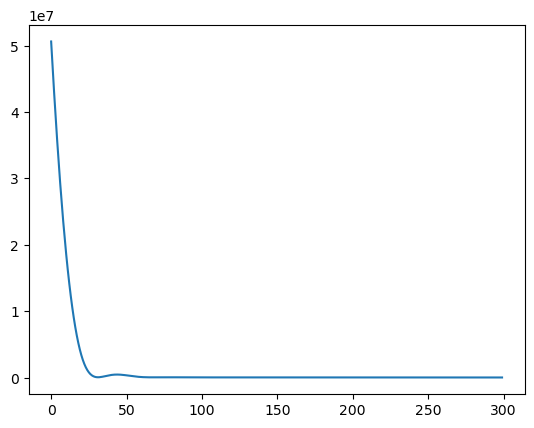

In [177]:
#k = 10
#plt.semilogy(diffusion.losses[k * epochs:(k+1) * epochs])
k = 5
plt.plot(diffusion.losses[k * epochs:(k+1) * epochs])
#plt.plot(diffusion.losses)

In [55]:
mu = np.ones(d)
np.mean(diffusion.X_gen @ mu > 0)

0.481

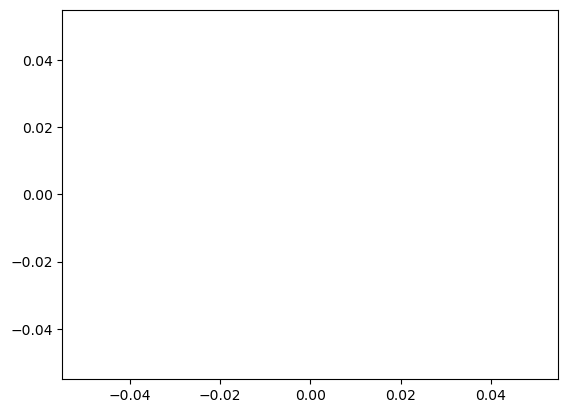

In [9]:
plt.plot(np.abs(diffusion.summary['Cos w']))
plt.show()

In [68]:
diffusion.X_gen @ mu

array([-10255.93066605, -10122.83572213, -10163.00633891, -10105.34532639,
       -10143.17758401,  10127.51506974,   9993.40886718, -10143.53556192,
        10241.52420495,   9991.30824356, -10087.90499913, -10133.25744899,
        10216.09850842, -10062.37002531,  10058.8140669 ,   9939.05903654,
        10035.83999498,  10024.86567217,  10075.30448466, -10098.16137013,
        10056.28300401, -10013.51279491, -10120.86676251, -10168.14923152,
        10090.4950184 ,   9985.61723268, -10060.81800018,  10055.26387651,
        10055.54160629,  10225.4321603 ,  10002.25523408,  10206.49270274,
       -10092.17202996,  10125.16261444,  10029.13143381,  10146.67692197,
        10042.04351625, -10120.84507667, -10116.54550407,  10054.68685022,
        10072.44947371, -10007.18284436, -10071.91903427,  10145.89087365,
       -10184.91194332,  10164.44441075, -10149.2347282 , -10081.68153683,
       -10241.63088394, -10091.64052593,  10085.68249915,  10100.30789333,
       -10116.68044911, -

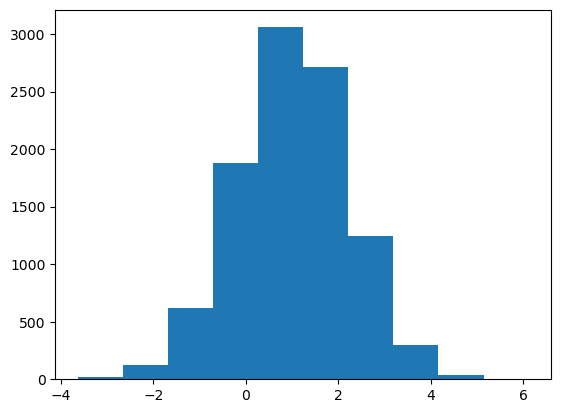

In [69]:
plt.hist(diffusion.X_gen[5])
plt.show()

In [ ]:
X_gen.shape

(1000, 100)